In [1]:
#|deafult_exp app

# Astro Recognizer

In [ ]:
!pip install -Uqq fastai gradio nbdev

'source' is not recognized as an internal or external command,
operable program or batch file.
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [92 lines of output]
      Ignoring numpy: markers 'python_version < "3.9"' don't match your environment
        Using cached setuptools-75.8.0-py3-none-any.whl.metadata (6.7 kB)
        Using cached Cython-0.29.37-py2.py3-none-any.whl.metadata (3.1 kB)
        Using cached cymem-2.0.11-cp313-cp313-win_amd64.whl.metadata (8.8 kB)
        Using cached preshed-3.0.9.tar.gz (14 kB)
        Installing build dependencies: started
        Installing build dependencies: finished with status 'done'
        Getting requirements to build wheel: started
        Getting requirements to build wheel: finished with status 'done'
        Preparing metadata (pyproject.toml): started
        Preparing metadata (pyproject.toml): finished with status 'done'
        Using cach

In [ ]:
%pip install setuptools cython cymem preshed murmurhash thinc

In [ ]:
from fastai.vision.all import *

In [6]:
#!export
from fastai.vision.all import load_learner
import gradio as gr

In [7]:
#!export
model = load_learner(f'models/astronomy-recognizer-v7.pkl')

In [8]:
#!export
astronomy_labels = (
'Andromeda Galaxy',
 'Black Holes',
 'Crab Nebula',
 'Eagle Nebula',
 'Earth Planet',
 'Exoplanets',
 'Jupiter Planet',
 'Mars Planet',
 'Mercury Planet',
 'Milky Way Galaxy',
 'Neptune Planet',
 'Orion Nebula',
 'Saturn Planet',
 'Supernova Remnants',
 'Triangulum Galaxy',
 'Uranus Planet',
 'Venus Planet'
)

def recognize_image(image):
  pred, idx, probs = model.predict(image)
  return dict(zip(astronomy_labels, map(float, probs)))

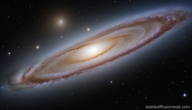

In [9]:
img = PILImage.create(f'test_images/andromeda_test.jpg')
img.thumbnail((192,192))
img

In [10]:
recognize_image(img)

{'Andromeda Galaxy': 0.9479253888130188,
 'Black Holes': 0.0001990620803553611,
 'Crab Nebula': 9.83418772193545e-07,
 'Eagle Nebula': 5.978899366709811e-07,
 'Earth Planet': 2.1997200747136958e-05,
 'Exoplanets': 5.672562565450789e-06,
 'Jupiter Planet': 0.0003686987329274416,
 'Mars Planet': 1.0630406421796579e-07,
 'Mercury Planet': 1.052552875080437e-06,
 'Milky Way Galaxy': 0.05112340301275253,
 'Neptune Planet': 4.1151301957143005e-06,
 'Orion Nebula': 2.3083291011971596e-07,
 'Saturn Planet': 0.00031577234040014446,
 'Supernova Remnants': 1.169688857771689e-06,
 'Triangulum Galaxy': 3.090002792305313e-05,
 'Uranus Planet': 4.159262232406036e-07,
 'Venus Planet': 4.6034358547331067e-07}

In [11]:
#!export
image = gr.Image()
label = gr.Label()
examples = [
    'test_images/andromeda_test.jpg',
    'test_images/blackhole_test.jpg',
    'test_images/milkyway_test.webp',
    'test_images/venus_test.webp'
    ]

iface = gr.Interface(fn=recognize_image, inputs=image, outputs=label, examples=examples)
iface.launch(inline=False)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1855e45bc17d872edc.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Notebook to Python Script Export

In [ ]:
from nbdev.export import notebook2script

In [ ]:
notebook2script('app.ipynb')